In [96]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import re
import matplotlib

In [97]:
arrests_df = pd.read_csv("/Users/cyclopath/BoulderHomeless/all-bookings-with-antihomeless-charges.csv")
arrests_df.head(10)

,Name,Booking No,Booked,Location,DOB,Race,Sex,Case No,Arresting Agency,Charge,...,ftc,booking_time,boulder,urination,vehicle_as_residence,public_obstruct,public_trespass,begging,antihomeless,smoking
0,"ARELLANO-ORDAZ,SIMON",1106625,2011-08-09 22:20:00,BJ INW,1988-04-10,W,M,110010043,BOULDER PD,18-18-405(2)(A)(I). SALE/MFG/DIST/CONT S,...,False,2011-08-09 22:20:00,False,False,False,False,False,False,False,False
1,"ARELLANO-ORDAZ,SIMON",1106625,2011-08-09 22:20:00,BJ INW,1988-04-10,W,M,110010043,BOULDER PD,18-6-401(7)(B)(I) CHILD ABUSE,...,False,2011-08-09 22:20:00,False,False,False,False,False,False,False,False
2,"ARELLANO-ORDAZ,SIMON",1106625,2011-08-09 22:20:00,BJ INW,1988-04-10,W,M,110010043,BOULDER PD,42-2-101(1) DRIVING WITHOUT A VA,...,False,2011-08-09 22:20:00,False,False,False,False,False,False,False,False
3,"ARELLANO-ORDAZ,SIMON",1106625,2011-08-09 22:20:00,BJ INW,1988-04-10,W,M,110010043,BOULDER PD,42-4-203 DROVE DEFECTIVE/UNSA,...,False,2011-08-09 22:20:00,False,False,False,False,False,False,False,False
4,"BECK,WILLIAM FRANCIS",1106627,2011-08-09 23:51:00,BJ BOK,1948-09-21,W,M,11-1746,UNIVERSITY OF COLORADO,BOULDER MUNI FTA:IMPROP CARE ANAM,...,False,2011-08-09 23:51:00,True,False,False,False,False,False,False,False
5,"BEIDLER,JUSTIN SCOTT",1106618,2011-08-09 08:00:00,BJ MND,1991-03-13,W,M,NaN,BOULDER COUNTY SHERIFFS OFFICE,42-4-1301(1)(B) DWAI,...,False,2011-08-09 08:00:00,False,False,False,False,False,False,False,False
6,"BEIDLER,JUSTIN SCOTT",1106618,2011-08-09 08:00:00,BJ MND,1991-03-13,W,M,NaN,BOULDER COUNTY SHERIFFS OFFICE,42-4-1301(1)(B) DWAI - .20+,...,False,2011-08-09 08:00:00,False,False,False,False,False,False,False,False
7,"CAMPBELL,KATHLEEN CLAIRE",1106620,2011-08-09 13:00:00,OJ HMD,1986-12-16,W,F,NaN,BOULDER COUNTY SHERIFFS OFFICE,42-4-1301(1)(A) DUI,...,False,2011-08-09 13:00:00,False,False,False,False,False,False,False,False
8,"COOK,NINA ELIZABETH",1106613,2011-08-09 08:30:00,BJ MNA,1989-01-06,W,F,NaN,BOULDER COUNTY SHERIFFS OFFICE,42-4-1307(6) DUI/DWAI: 3RD & SUBS,...,False,2011-08-09 08:30:00,False,False,False,False,False,False,False,False
9,"COOK,NINA ELIZABETH",1106613,2011-08-09 08:30:00,BJ MNA,1989-01-06,W,F,NaN,BOULDER COUNTY SHERIFFS OFFICE,42-4-1301(1)(B) DWAI,...,False,2011-08-09 08:30:00,False,False,False,False,False,False,False,False


In [98]:
booked = arrests_df.Booked
year = []
month = []
hour = []
for date_time in booked:
    ymd_time = re.match(r'^(2\d{3})-(\d{2})-\d{2} (\d{2})', date_time)
    if ymd_time:
        year.append(ymd_time.group(1))
        month.append(ymd_time.group(2))
        hour.append(ymd_time.group(3))
        # print("year:{} month:{} hour:{}".format(year, month, hour))


In [101]:
arrests_df['BookedYear'] = year
arrests_df['BookedMonth'] = month
arrests_df['BookedHour'] = hour
arrests_df.head(10)


,Name,Booking No,Booked,Location,DOB,Race,Sex,Case No,Arresting Agency,Charge,...,urination,vehicle_as_residence,public_obstruct,public_trespass,begging,antihomeless,smoking,BookedYear,BookedMonth,BookedHour
0,"ARELLANO-ORDAZ,SIMON",1106625,2011-08-09 22:20:00,BJ INW,1988-04-10,W,M,110010043,BOULDER PD,18-18-405(2)(A)(I). SALE/MFG/DIST/CONT S,...,False,False,False,False,False,False,False,2011,08,22
1,"ARELLANO-ORDAZ,SIMON",1106625,2011-08-09 22:20:00,BJ INW,1988-04-10,W,M,110010043,BOULDER PD,18-6-401(7)(B)(I) CHILD ABUSE,...,False,False,False,False,False,False,False,2011,08,22
2,"ARELLANO-ORDAZ,SIMON",1106625,2011-08-09 22:20:00,BJ INW,1988-04-10,W,M,110010043,BOULDER PD,42-2-101(1) DRIVING WITHOUT A VA,...,False,False,False,False,False,False,False,2011,08,22
3,"ARELLANO-ORDAZ,SIMON",1106625,2011-08-09 22:20:00,BJ INW,1988-04-10,W,M,110010043,BOULDER PD,42-4-203 DROVE DEFECTIVE/UNSA,...,False,False,False,False,False,False,False,2011,08,22
4,"BECK,WILLIAM FRANCIS",1106627,2011-08-09 23:51:00,BJ BOK,1948-09-21,W,M,11-1746,UNIVERSITY OF COLORADO,BOULDER MUNI FTA:IMPROP CARE ANAM,...,False,False,False,False,False,False,False,2011,08,23
5,"BEIDLER,JUSTIN SCOTT",1106618,2011-08-09 08:00:00,BJ MND,1991-03-13,W,M,NaN,BOULDER COUNTY SHERIFFS OFFICE,42-4-1301(1)(B) DWAI,...,False,False,False,False,False,False,False,2011,08,08
6,"BEIDLER,JUSTIN SCOTT",1106618,2011-08-09 08:00:00,BJ MND,1991-03-13,W,M,NaN,BOULDER COUNTY SHERIFFS OFFICE,42-4-1301(1)(B) DWAI - .20+,...,False,False,False,False,False,False,False,2011,08,08
7,"CAMPBELL,KATHLEEN CLAIRE",1106620,2011-08-09 13:00:00,OJ HMD,1986-12-16,W,F,NaN,BOULDER COUNTY SHERIFFS OFFICE,42-4-1301(1)(A) DUI,...,False,False,False,False,False,False,False,2011,08,13
8,"COOK,NINA ELIZABETH",1106613,2011-08-09 08:30:00,BJ MNA,1989-01-06,W,F,NaN,BOULDER COUNTY SHERIFFS OFFICE,42-4-1307(6) DUI/DWAI: 3RD & SUBS,...,False,False,False,False,False,False,False,2011,08,08
9,"COOK,NINA ELIZABETH",1106613,2011-08-09 08:30:00,BJ MNA,1989-01-06,W,F,NaN,BOULDER COUNTY SHERIFFS OFFICE,42-4-1301(1)(B) DWAI,...,False,False,False,False,False,False,False,2011,08,08


In [102]:
anti_homeless = arrests_df[arrests_df.antihomeless == True]
anti_homeless[:2]

,Name,Booking No,Booked,Location,DOB,Race,Sex,Case No,Arresting Agency,Charge,...,urination,vehicle_as_residence,public_obstruct,public_trespass,begging,antihomeless,smoking,BookedYear,BookedMonth,BookedHour
82,"BAILEY,LLOYD FRANCIS",804040,2008-04-29 23:00:00,,1983-08-31,W,M,P08-5596,BOULDER PD,BOULDER MUNI - FTA FTA-URINATE PUBLIC,...,True,False,False,False,False,True,False,2008,04,23
154,"ENGLISH,TIMOTHY NOEL",702692,2007-03-26 01:30:00,,1979-12-05,W,M,P074163,BOULDER PD,BOULDER MUNI CAMP W/O PERMISSION,...,False,False,False,False,False,True,False,2007,03,01


In [103]:
anti_homeless_years = {}
anti_homeless_2000 = anti_homeless[anti_homeless.BookedYear == '2000']
anti_homeless_2001 = anti_homeless[anti_homeless.BookedYear == '2001']
anti_homeless_2002 = anti_homeless[anti_homeless.BookedYear == '2002']
anti_homeless_2003 = anti_homeless[anti_homeless.BookedYear == '2003']
anti_homeless_2004 = anti_homeless[anti_homeless.BookedYear == '2004']
anti_homeless_2005 = anti_homeless[anti_homeless.BookedYear == '2005']
anti_homeless_2006 = anti_homeless[anti_homeless.BookedYear == '2006']
anti_homeless_2007 = anti_homeless[anti_homeless.BookedYear == '2007']
anti_homeless_2008 = anti_homeless[anti_homeless.BookedYear == '2008']
anti_homeless_2009 = anti_homeless[anti_homeless.BookedYear == '2009']
anti_homeless_2010 = anti_homeless[anti_homeless.BookedYear == '2010']
anti_homeless_2011 = anti_homeless[anti_homeless.BookedYear == '2011']
anti_homeless_2012 = anti_homeless[anti_homeless.BookedYear == '2012']
anti_homeless_2013 = anti_homeless[anti_homeless.BookedYear == '2013']
anti_homeless_2014 = anti_homeless[anti_homeless.BookedYear == '2014']
anti_homeless_2015 = anti_homeless[anti_homeless.BookedYear == '2015']
anti_homeless_2016 = anti_homeless[anti_homeless.BookedYear == '2016']
anti_homeless_2017 = anti_homeless[anti_homeless.BookedYear == '2017']
if len(anti_homeless_2001) > 0:
    anti_homeless_years["2000"] = anti_homeless_2000
if len(anti_homeless_2001) > 0:
    anti_homeless_years["2001"] = anti_homeless_2001
if len(anti_homeless_2002) > 0:
    anti_homeless_years["2002"] = anti_homeless_2002
if len(anti_homeless_2003) > 0:
    anti_homeless_years["2003"] = anti_homeless_2003
if len(anti_homeless_2004) > 0:
    anti_homeless_years["2004"] = anti_homeless_2004
if len(anti_homeless_2005) > 0:
    anti_homeless_years["2005"] = anti_homeless_2005
if len(anti_homeless_2006) > 0:
    anti_homeless_years["2006"] = anti_homeless_2006
if len(anti_homeless_2007) > 0:
    anti_homeless_years["2007"] = anti_homeless_2007
if len(anti_homeless_2008) > 0:
    anti_homeless_years["2008"] = anti_homeless_2008
if len(anti_homeless_2009) > 0:
    anti_homeless_years["2009"] = anti_homeless_2009
if len(anti_homeless_2010) > 0:
    anti_homeless_years["2010"] = anti_homeless_2010
if len(anti_homeless_2011) > 0:
    anti_homeless_years["2011"] = anti_homeless_2011
if len(anti_homeless_2012) > 0:
    anti_homeless_years["2012"] = anti_homeless_2012
if len(anti_homeless_2013) > 0:
    anti_homeless_years["2013"] = anti_homeless_2013
if len(anti_homeless_2014) > 0:
    anti_homeless_years["2014"] = anti_homeless_2014
if len(anti_homeless_2015) > 0:
    anti_homeless_years["2015"] = anti_homeless_2015
if len(anti_homeless_2016) > 0:
    anti_homeless_years["2016"] = anti_homeless_2016
if len(anti_homeless_2017) > 0:
    anti_homeless_years["2017"] = anti_homeless_2017


In [104]:
def count_bookings_by_year(input_df, year):
    unique_booking = []
    bookings_this_year = input_df['Booking No']
    for booking in bookings_this_year:
        if booking not in unique_booking:
            unique_booking.append(booking)
    return len(unique_booking)

In [93]:
num_2000_bookings = count_bookings_by_year(anti_homeless_2000, '2000')
count_by_year = {}
for year, df in anti_homeless_years.items():
    num_arrests = count_bookings_by_year(df, year)
    yr = "'" + year + "'"
    count_by_year[yr] = num_arrests
    print("year: {}, num arrests: {}".format(yr, num_arrests))
    


year: '2000', num arrests: 112
year: '2001', num arrests: 126
year: '2002', num arrests: 128
year: '2003', num arrests: 117
year: '2004', num arrests: 117
year: '2005', num arrests: 111
year: '2006', num arrests: 194
year: '2007', num arrests: 202
year: '2008', num arrests: 199
year: '2009', num arrests: 243
year: '2010', num arrests: 176
year: '2011', num arrests: 148
year: '2012', num arrests: 248
year: '2013', num arrests: 219
year: '2014', num arrests: 196
year: '2015', num arrests: 283
year: '2016', num arrests: 262
year: '2017', num arrests: 143


In [105]:
%matplotlib inline

In [114]:
arrests_by_year_df = pd.Series(count_by_year, index=count_by_year.keys())
arrests_by_year_df

'2000'    112
'2001'    126
'2002'    128
'2003'    117
'2004'    117
'2005'    111
'2006'    194
'2007'    202
'2008'    199
'2009'    243
'2010'    176
'2011'    148
'2012'    248
'2013'    219
'2014'    196
'2015'    283
'2016'    262
'2017'    143
dtype: int64

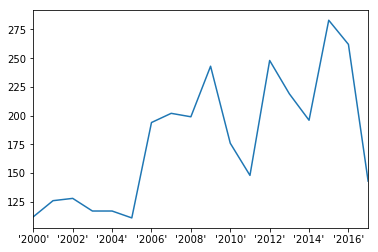

In [115]:
arrests_by_year_df.plot()